# DATA ANALYSIS

### Main observations from the data:

- Quality of life is by definition [0,1]. But majority of the mass is between [0.5, 0.6].
- It is hard to believe that quality of life in AUS is the second worst in the list!
- Perception of qualitfy of life for MEN and WOMEN are different.  M/W -> 1


- Missing values
- Access-type inputs make sense but not population or detailed energy. Similarly spendings will have long term impacts.
- There are some inputs that they may have high corrolation between them, e.g. corr(GNI, GDP) = 0.9, corr(access to electricity(urban|rural), sanity) = 0.8.

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("../data/train.csv", sep=";", decimal=",")

In [3]:
df

,id,LOCATION,TIME,GENDER,Population (% of total),EDU_TERTIARY_PC_WKGPOP,CPI_AGRWTH,GDP_USD_CAP,GOV_SPEND_EDU,%_Sanitation_Access,...,Population ages 50-54 (as % of specified gender population),Population ages 55-59 (as % of specified gender population),Population ages 60-64 (as % of specified gender population),Population ages 65-69 (as % of specified gender population),Population ages 70-74 (as % of specified gender population),Population ages 75-79 (as % of specified gender population),Population ages 80 and older (as % of specified gender population),TER_Enrolment_rate,GNI per capita; Atlas method (current US$),Quality_of_life_measure
0,1,AUS,1993,MEN,49.780616,23.508869,1.753653,19929.78137,5.50922,100.0,...,5.125739,4.363110,4.022097,3.744820,2.825824,1.831723,1.659637,65.428513,18930,0.172055
1,2,AUS,1993,WOMEN,50.219384,21.418512,1.753653,19929.78137,5.50922,100.0,...,4.874607,4.220368,4.009922,3.997684,3.396483,2.549315,3.191249,64.678619,18930,0.238161
2,3,AUS,1994,MEN,49.762137,24.407070,1.969635,21134.14664,5.24752,100.0,...,5.260645,4.417681,3.955058,3.738131,2.914956,1.854255,1.710258,66.160980,18890,0.173419
3,4,AUS,1994,WOMEN,50.237863,21.740088,1.969635,21134.14664,5.24752,100.0,...,5.003437,4.267955,3.941137,3.942406,3.479801,2.549259,3.289984,66.824181,18890,0.239558
4,5,AUS,1995,MEN,49.758261,25.825409,4.627767,22098.57288,5.12905,100.0,...,5.448858,4.480351,3.926157,3.716121,2.988446,1.905839,1.739907,68.701340,19320,0.173718
5,6,AUS,1995,WOMEN,50.241739,22.807888,4.627767,22098.57288,5.12905,100.0,...,5.185767,4.322439,3.906003,3.882738,3.536198,2.586106,3.372942,71.767082,19320,0.238771
6,7,AUS,1997,MEN,49.798905,23.803526,0.224887,24160.25514,NaN,100.0,...,5.971580,4.645555,3.939397,3.617378,3.096863,2.026714,1.866579,77.781097,21980,0.175278
7,8,AUS,1997,WOMEN,50.201095,24.797144,0.224887,24160.25514,NaN,100.0,...,5.701808,4.462526,3.889003,3.729181,3.551820,2.723371,3.531531,83.166786,21980,0.239344
8,9,AUS,1998,MEN,49.833357,24.421713,0.860135,25342.18977,NaN,100.0,...,6.298525,4.734440,4.001133,3.554846,3.140296,2.127225,1.892766,61.850609,21790,0.174626
9,10,AUS,1998,WOMEN,50.166643,26.414537,0.860135,25342.18977,NaN,100.0,...,6.021525,4.545056,3.931565,3.651983,3.531229,2.832632,3.585140,75.315971,21790,0.237625


### RESPONSE VARIABLE: QUALITY OF LIFE
Let's start our analysis by the variable Quality of Life. 

In [4]:
columns = ["LOCATION", "TIME", "GENDER", "Quality_of_life_measure"]

First we ignore the difference between men and women (by taking averages).

In [5]:
Q = df[columns].groupby(by=["LOCATION", "TIME"]).mean().reset_index().pivot(index="LOCATION", columns="TIME", values="Quality_of_life_measure")
Q

TIME,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUS,0.205108,0.206488,0.206244,NaN,0.207311,0.206126,0.207966,0.211741,0.220436,0.219323,...,0.233663,0.233465,0.235879,0.241946,0.246483,0.252769,0.262505,0.270616,0.257249,0.261481
BEL,NaN,NaN,NaN,NaN,NaN,NaN,0.476506,0.483041,0.483794,0.490519,...,0.524780,0.525326,0.528806,0.525845,0.538621,0.540062,0.540961,0.552038,0.535028,0.536142
CAN,NaN,NaN,0.482488,0.482656,0.485674,0.490370,0.496724,0.501227,0.506408,0.513829,...,0.532031,0.533591,0.533392,0.538476,0.543750,0.552085,0.557407,0.555576,0.560717,0.563307
CHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.519693,0.525761,0.524101,0.538725,0.546939,0.550823,0.554190,0.556196,0.556018,NaN
COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504833,0.507662,0.517666,0.525227,0.533987,0.541043,0.542660,0.520075,0.551691,0.549962
DEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.556746,0.564340,0.571776,0.574346,0.587619,0.589514,0.589593,0.601679,0.600183,0.603258
DNK,NaN,NaN,NaN,NaN,NaN,NaN,0.547816,0.557407,0.557235,0.558497,...,0.582127,0.594088,0.587762,0.581139,0.596616,0.602905,0.602737,0.615682,0.618557,0.623252
ESP,NaN,NaN,NaN,NaN,NaN,NaN,0.496042,0.508056,0.519601,0.524397,...,0.568704,0.571674,0.561172,0.560882,0.566671,0.556506,0.563698,0.571391,0.572409,0.581816
EST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406386,0.403908,0.415883,...,0.452211,0.471045,0.469487,0.443169,0.468370,0.483543,0.484909,0.490978,0.503768,0.505659


Majority of the data is after year 2000. So we have around 15years of data.

In [6]:
Q.count()

TIME
1993     2
1994     2
1995     4
1996     3
1997     4
1998     6
1999    12
2000    17
2001    18
2002    19
2003    21
2004    21
2005    23
2006    23
2007    24
2008    25
2009    25
2010    25
2011    25
2012    25
2013    25
2014    25
2015    25
2016    22
dtype: int64

AUS (Austria) and LUX (Luxembourg) are respectively in the second and third worst plance in the rank?! This is consistent over time. The rank of any country does not seem to change significantly over time.

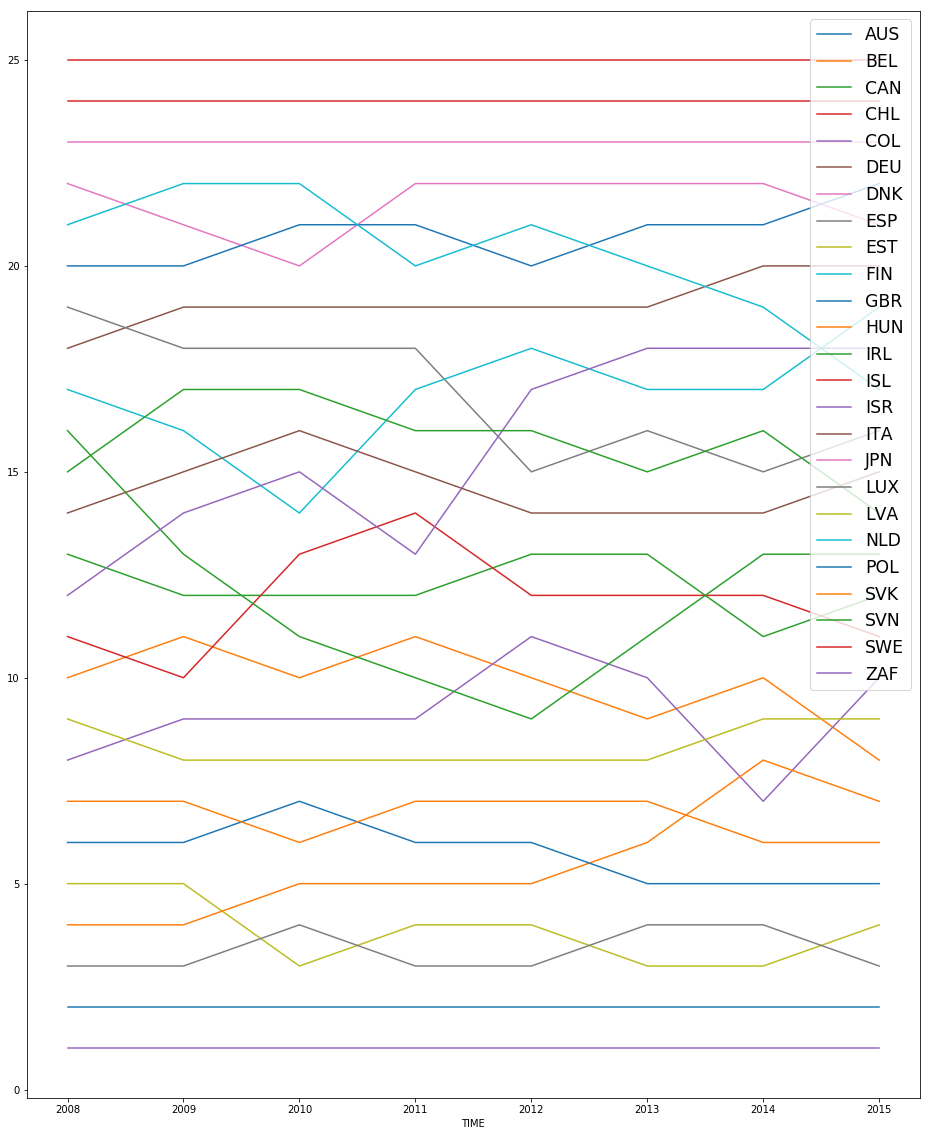

In [7]:
Q.iloc[:, 15:-1].rank().transpose().plot(figsize=(16,20)).legend(loc=1, fontsize='xx-large')

Even more interestingly the score is too low ~0.25 relative to the rest where the average is around 0.50

In [8]:
Q[2015].sort_values()

LOCATION
ZAF    0.255886
AUS    0.257249
LUX    0.444714
EST    0.503768
POL    0.528350
SVK    0.532378
HUN    0.532899
BEL    0.535028
LVA    0.540441
COL    0.551691
CHL    0.556018
CAN    0.560717
IRL    0.561966
SVN    0.570965
ITA    0.572095
ESP    0.572409
NLD    0.583630
ISR    0.587546
FIN    0.588151
DEU    0.600183
DNK    0.618557
GBR    0.619918
JPN    0.625744
SWE    0.657795
ISL    0.694361
Name: 2015, dtype: float64

The quality in average seems to be increasing over time. To say more about this, we should create a **world** quality of life index.

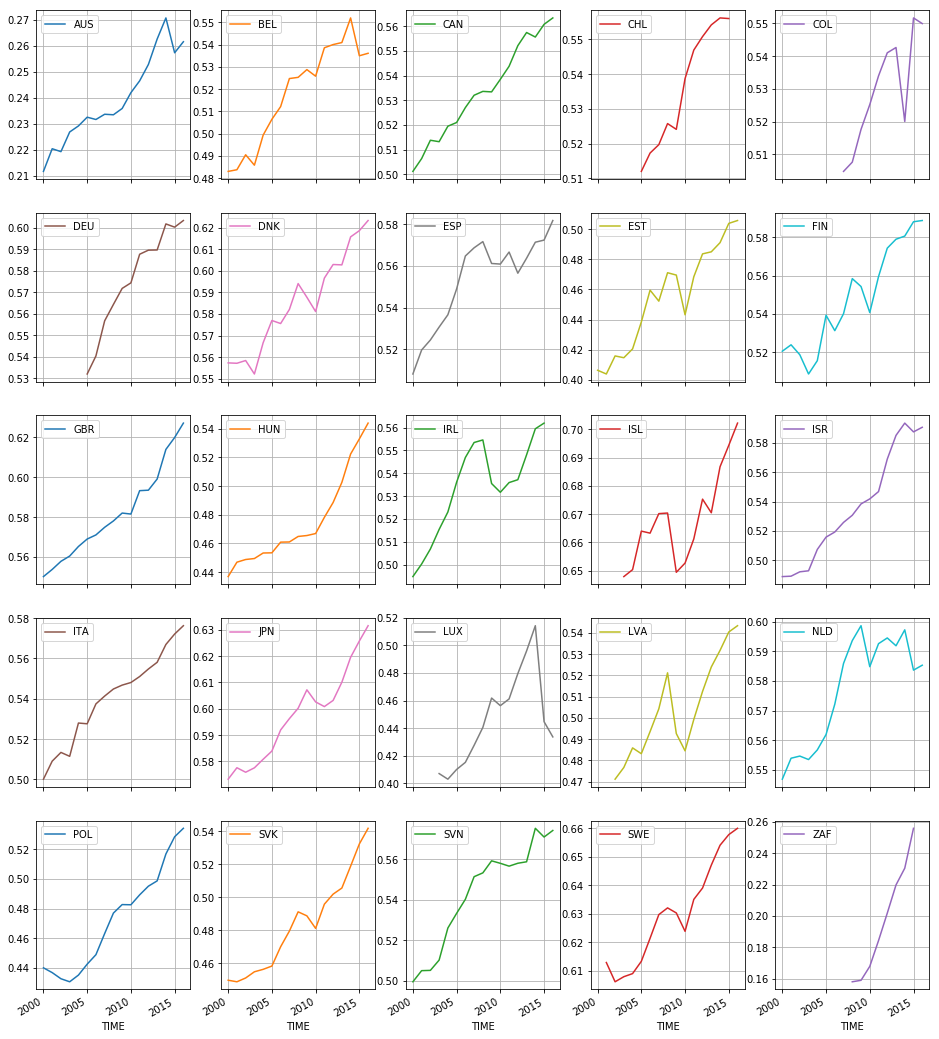

In [9]:
Q.transpose().loc[2000:].plot(subplots=True, grid=True, layout=(5,5), figsize=(16,20));

MEN vs WOMEN

In [10]:
mw = df[columns].pivot_table(index=["LOCATION", "TIME"], columns="GENDER", values="Quality_of_life_measure")
mw.columns
mw["ratio"] = mw["MEN"]/mw["WOMEN"]
mw

GENDER              MEN     WOMEN     ratio
LOCATION TIME                              
AUS      1993  0.172055  0.238161  0.722432
         1994  0.173419  0.239558  0.723913
         1995  0.173718  0.238771  0.727552
         1997  0.175278  0.239344  0.732328
         1998  0.174626  0.237625  0.734883
         1999  0.176441  0.239491  0.736732
         2000  0.181307  0.242175  0.748660
         2001  0.189981  0.250892  0.757222
         2002  0.189997  0.248650  0.764114
         2003  0.198652  0.255075  0.778796
         2004  0.201534  0.256824  0.784717
         2005  0.205462  0.259618  0.791400
         2006  0.204586  0.258723  0.790752
         2007  0.207182  0.260143  0.796416
         2008  0.208134  0.258795  0.804245
         2009  0.210027  0.261731  0.802453
         2010  0.216637  0.267255  0.810601
         2011  0.221155  0.271811  0.813636
         2012  0.228003  0.277534  0.821530
         2013  0.238854  0.286156  0.834698
         2014  0.247515  0.293717  0.842700
         2015  0.234774  0.279725  0.839303
         2016  0.238984  0.283977  0.841561
BEL      1999  0.481764  0.471248  1.022314
         2000  0.489946  0.476135  1.029006
         2001  0.490961  0.476627  1.030073
         2002  0.496432  0.484606  1.024402
         2003  0.490043  0.481624  1.017481
         2004  0.502532  0.496176  1.012812
         2005  0.508929  0.504014  1.009751
...                 ...       ...       ...
SVN      2011  0.536492  0.576736  0.930222
         2012  0.539824  0.576250  0.936788
         2013  0.541750  0.575786  0.940887
         2014  0.560273  0.590275  0.949172
         2015  0.557444  0.584485  0.953735
         2016  0.556128  0.592289  0.938947
SWE      2001  0.595959  0.629778  0.946300
         2002  0.588032  0.624171  0.942101
         2003  0.589438  0.626337  0.941088
         2004  0.592346  0.625594  0.946854
         2005  0.598413  0.628156  0.952649
         2006  0.609287  0.633485  0.961802
         2007  0.618215  0.641180  0.964184
         2008  0.620809  0.643300  0.965038
         2009  0.617399  0.643157  0.959950
         2010  0.613133  0.634509  0.966310
         2011  0.623961  0.646117  0.965708
         2012  0.627412  0.650656  0.964277
         2013  0.636071  0.658081  0.966554
         2014  0.640995  0.667129  0.960825
         2015  0.642666  0.672925  0.955034
         2016  0.644115  0.675914  0.952955
ZAF      2008  0.165500  0.150514  1.099569
         2009  0.160374  0.157514  1.018158
         2010  0.167066  0.168578  0.991031
         2011  0.180099  0.188399  0.955945
         2012  0.195383  0.208149  0.938668
         2013  0.209561  0.229971  0.911249
         2014  0.219622  0.241271  0.910271
         2015  0.245091  0.266682  0.919041

[421 rows x 3 columns]

In most countries, the ratio is getting better, converges to 1.

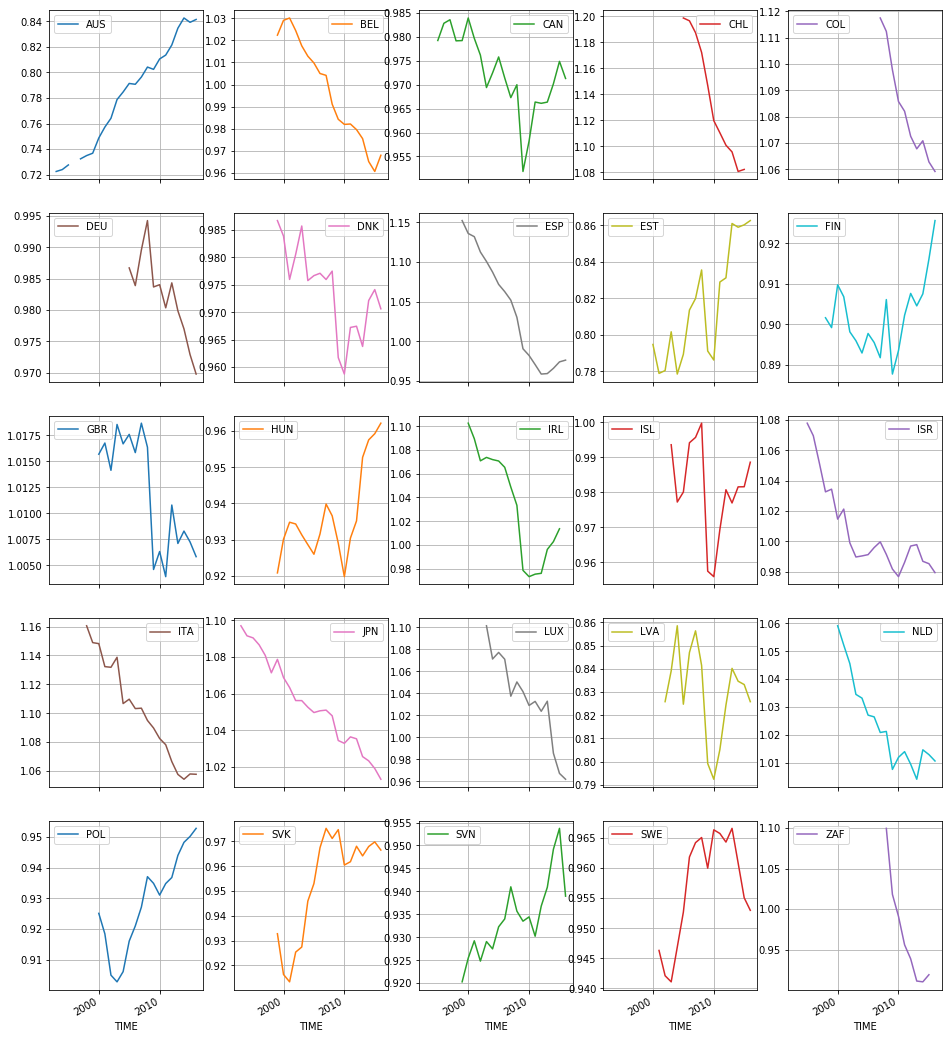

In [11]:
(mw["ratio"].reset_index().pivot_table(index="TIME", columns="LOCATION", values="ratio")
 .plot(subplots=True, grid=True, layout=(5,5), figsize=(16,20)));

# EXPLONATORY VARIABLES

We concentrate on some small subset of variables which are more sensible to have an influence on the response variable.

In [12]:
df.columns

Index(['id', 'LOCATION', 'TIME', 'GENDER', 'Population (% of total)',
       'EDU_TERTIARY_PC_WKGPOP', 'CPI_AGRWTH', 'GDP_USD_CAP', 'GOV_SPEND_EDU',
       '%_Sanitation_Access',
       'Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT]',
       'Access to electricity (% of rural population with access) [1 2_ACCESS ELECTRICITY RURAL]',
       'Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]',
       'Access to electricity (% of urban population with access) [1 3_ACCESS ELECTRICITY URBAN]',
       'Energy intensity level of primary energy (MJ/2011 USD PPP) [6 1_PRIMARY ENERGY INTENSITY]',
       'Renewable electricity output (GWh) [4 1 2_REN ELECTRICITY OUTPUT]',
       'Renewable electricity share of total electricity output (%) [4 1_SHARE RE IN ELECTRICITY]',
       'Renewable energy consumption (TJ) [3 1_RE CONSUMPTION]',
       'Renewable energy share of TFEC (%) [2 1_SHARE TOTAL RE IN TFEC]',
       'Total ele

In [13]:
df = df.set_index(["LOCATION", "TIME", "GENDER"]);

In [14]:
columns = [ 
    "Quality_of_life_measure", 
    
    "CPI_AGRWTH",
    "GDP_USD_CAP",
    "GNI per capita; Atlas method (current US$)",

    "TER_Enrolment_rate",
    "EDU_TERTIARY_PC_WKGPOP",
   
    "Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT]",
    "Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]",
    "Access to electricity (% of rural population with access) [1 2_ACCESS ELECTRICITY RURAL]",
    "Access to electricity (% of urban population with access) [1 3_ACCESS ELECTRICITY URBAN]",
    "%_Sanitation_Access",
       ]

In [15]:
df[columns].describe()

,Quality_of_life_measure,CPI_AGRWTH,GDP_USD_CAP,GNI per capita; Atlas method (current US$),TER_Enrolment_rate,EDU_TERTIARY_PC_WKGPOP,Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT],Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT],Access to electricity (% of rural population with access) [1 2_ACCESS ELECTRICITY RURAL],Access to electricity (% of urban population with access) [1 3_ACCESS ELECTRICITY URBAN],%_Sanitation_Access
count,842.000000,770.000000,770.000000,842.000000,686.000000,770.000000,668.000000,748.000000,748.000000,748.000000,798.000000
mean,0.514190,2.510411,33057.073282,31151.686461,64.562024,30.054748,97.990863,99.373479,98.770492,99.886524,96.762155
std,0.101764,2.423386,14492.012431,17874.560078,18.621858,10.818806,6.400862,5.345584,6.989667,0.770421,6.391277
min,0.150514,-4.478103,9390.760261,3930.000000,9.699270,8.027741,5.353355,5.353355,5.353355,91.400000,62.300000
25%,0.481632,0.957018,24545.767430,15480.000000,52.881377,22.337600,100.000000,100.000000,100.000000,100.000000,97.600000
50%,0.534664,2.189299,32072.688370,29760.000000,62.993641,30.043559,100.000000,100.000000,100.000000,100.000000,99.100000
75%,0.575368,3.433517,40333.144350,44760.000000,77.530069,37.574340,100.000000,100.000000,100.000000,100.000000,99.800000
max,0.706265,15.402320,102553.861300,88240.000000,108.137993,62.385227,100.000000,100.000000,100.000000,100.000000,100.000000


Access to ... type columns are rarely different from 100%. Except for Colombia in 2014 which is 5% which is obviously a mistake in the data since previous values are greater than 95%.

In [16]:
df["Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]"].sort_values()

LOCATION  TIME  GENDER
COL       2014  MEN        5.353355
                WOMEN      5.353355
ZAF       2008  MEN       81.900000
                WOMEN     81.900000
          2009  WOMEN     82.700000
                MEN       82.700000
          2010  WOMEN     82.900000
                MEN       82.900000
          2011  WOMEN     84.700000
                MEN       84.700000
          2012  MEN       85.300000
                WOMEN     85.300000
          2013  MEN       85.400000
                WOMEN     85.400000
          2014  MEN       86.000000
                WOMEN     86.000000
COL       2007  WOMEN     95.882935
                MEN       95.882935
          2009  MEN       96.057229
                WOMEN     96.057229
          2011  WOMEN     96.693600
                MEN       96.693600
          2010  MEN       96.788995
                WOMEN     96.788995
          2008  MEN       96.806763
                WOMEN     96.806763
          2012  MEN       97.032176
     

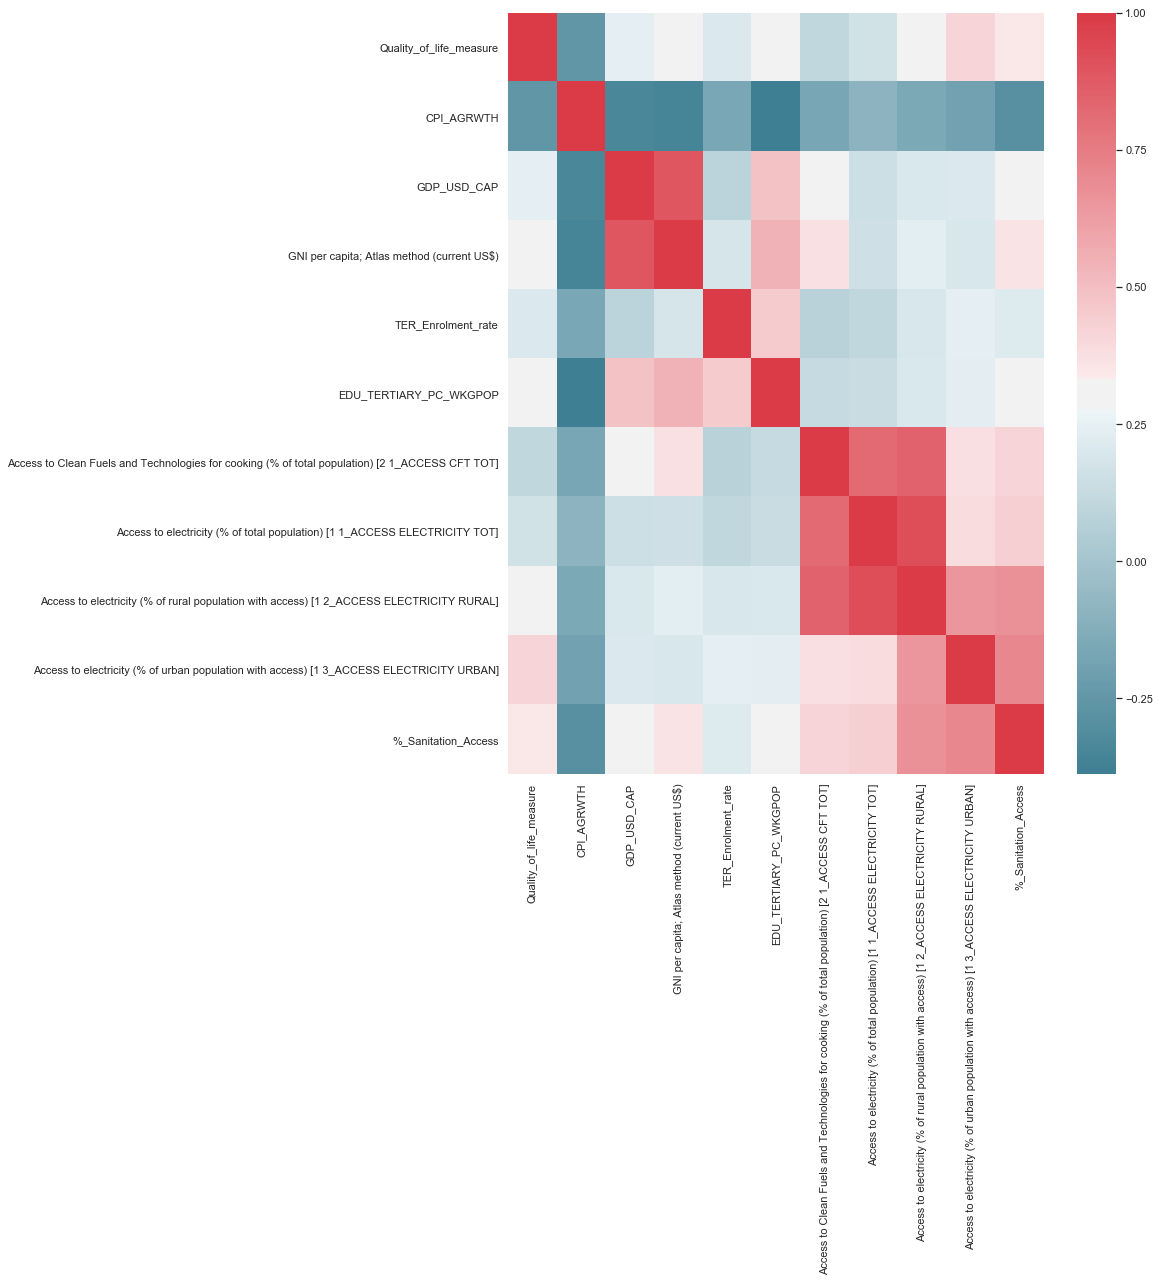

In [18]:
corr = df[columns].corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))
sns.set(rc={'figure.figsize':(12,14)})